[[1/2, 1/2*sqrt(3)], [-1/2*sqrt(3), 1/2]]
[0, 0]
[11/2*sqrt(3), 11/2]
[11/2*sqrt(3) + 23/2, -23/2*sqrt(3) + 11/2]
[23/2, -23/2*sqrt(3)]


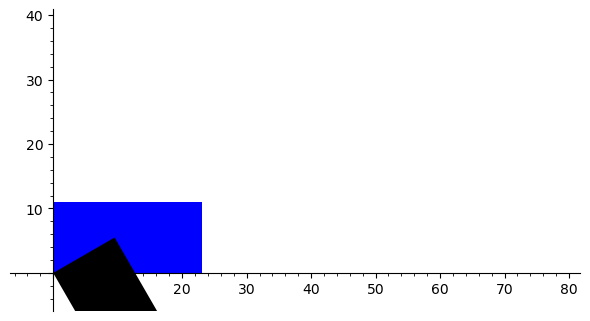

In [83]:
AB = 11
BC = 23
CD = 11
AD = 23
alpha = 60

x0 = 0
y0 = 0
x1 = x0
y1 = y0 + AB
x2 = x0 + AD
y2 = y0 + AB
x3 = x0 + AD
y3 = y0

g = Graphics()

vecs1 = [[x0, y0], [x1, y1], [x2, y2], [x3, y3]]

def rot(alpha):
    return alpha / 180 * pi
    
mat_rot = [
    [cos(rot(alpha)), sin(rot(alpha))],
    [-sin(rot(alpha)), cos(rot(alpha))]
]

def mult_matrix_vec(X, Y):
    h = len(X)
    w = len(Y)
    assert w == len(X[0]) and isinstance(Y[0], Integer), "matrix is invalid" 
    result = [0 for _ in range(w)]
    for j in range(h):  
        for k in range(w):  
            result[j] += X[j][k] * Y[k]  
    return result

g += polygon2d(vecs1, rgbcolor=(5,0,1))

vecs1_rotated = []

print(mat_rot)
for v in vecs1:
    v1_rotated = mult_matrix_vec(mat_rot, v)
    vecs1_rotated.append(v1_rotated)
    print(v1_rotated)

g += polygon2d(vecs1_rotated, rgbcolor=(0,0,0))

g.set_axes_range(-5, 80, -5, 40)
g.show()

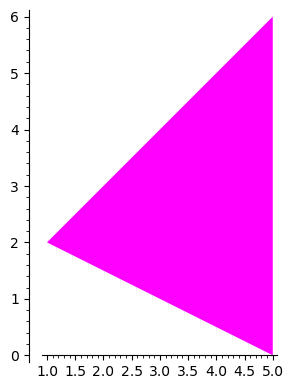

In [43]:
polygon2d([[1,2], [5,6], [5,0]], rgbcolor=(1,0,1))
